In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/train/ts.csv', skiprows=1)
df.head()

,fourier_7_2_1,fourier_7_2_2,fourier_7_2_3,fourier_7_2_4,fourier_9_2_1,fourier_9_2_2,fourier_9_2_3,fourier_9_2_4,holiday_ru,lag_new_orders_count_2,lag_new_orders_count_7,lag_new_orders_count_9,lag_orders_count_5,lag_orders_count_6,lag_orders_count_7,mean_3,new_orders_count,orders_count,target
0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,294.000000,4.0,78.0,0.0
1,0.781831,0.623490,0.974928,-0.222521,0.642788,0.766044,0.984808,0.173648,0,0.0,0.0,0.0,0.0,0.0,0.0,237.500000,5.0,78.0,0.0
2,0.974928,-0.222521,-0.433884,-0.900969,0.984808,0.173648,0.342020,-0.939693,0,4.0,0.0,0.0,0.0,0.0,0.0,257.666667,6.0,92.0,0.0
3,0.433884,-0.900969,-0.781831,0.623490,0.866025,-0.500000,-0.866025,-0.500000,0,5.0,0.0,0.0,0.0,0.0,0.0,245.500000,5.0,64.0,0.0
4,-0.433884,-0.900969,0.781831,0.623490,0.342020,-0.939693,-0.642788,0.766044,0,6.0,0.0,0.0,0.0,0.0,0.0,253.400000,9.0,78.0,0.0


<AxesSubplot:>

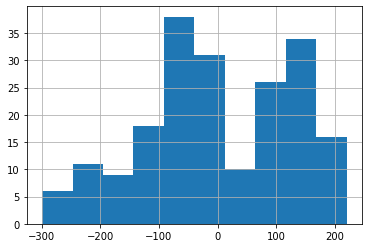

In [48]:
df.target.hist()

<AxesSubplot:>

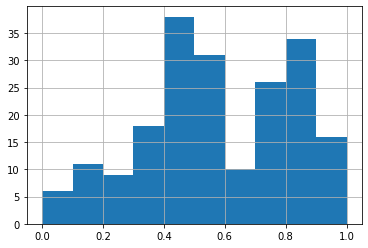

In [56]:
from sklearn.preprocessing import MinMaxScaler


def minmax(s: pd.Series) -> pd.Series:
    mn = s.min()
    mx = s.max()
    s = (s - mn) / (mx - mn)
    return s


df = df.assign(target=minmax(df.target))

df.target.hist()

In [57]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_percentage_error
from catboost import CatBoostRegressor

In [58]:
i = 300

model = CatBoostRegressor(
    iterations=i,
    # learning_rate=0.9,
    depth=10,
    loss_function='MAPE',
    verbose=i // 10
)

x, y = df.drop('target', axis=1), df.target

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)

model.fit(train_x, train_y, eval_set=(test_x, test_y), use_best_model=True)
preds = model.predict(test_x)
mean_absolute_percentage_error(test_y, preds)

0:	learn: 0.2065569	test: 0.1860867	best: 0.1860867 (0)	total: 561us	remaining: 168ms
30:	learn: 0.0917623	test: 0.1207012	best: 0.1207012 (30)	total: 51.1ms	remaining: 443ms
60:	learn: 0.0430327	test: 0.1005625	best: 0.1005625 (60)	total: 105ms	remaining: 411ms
90:	learn: 0.0216347	test: 0.0931659	best: 0.0931659 (90)	total: 162ms	remaining: 372ms
120:	learn: 0.0111033	test: 0.0905551	best: 0.0905551 (120)	total: 227ms	remaining: 335ms
150:	learn: 0.0059748	test: 0.0898336	best: 0.0898276 (149)	total: 286ms	remaining: 282ms
180:	learn: 0.0031350	test: 0.0898985	best: 0.0898137 (153)	total: 345ms	remaining: 227ms
210:	learn: 0.0016184	test: 0.0899248	best: 0.0898137 (153)	total: 408ms	remaining: 172ms
240:	learn: 0.0008451	test: 0.0899587	best: 0.0898137 (153)	total: 476ms	remaining: 116ms
270:	learn: 0.0004493	test: 0.0899530	best: 0.0898137 (153)	total: 544ms	remaining: 58.2ms
299:	learn: 0.0002602	test: 0.0899597	best: 0.0898137 (153)	total: 610ms	remaining: 0us

bestTest = 0.089813

0.23548352173353546

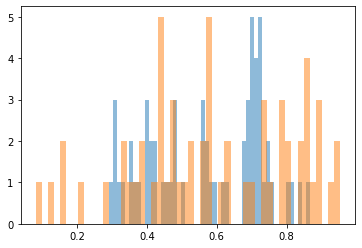

In [59]:
plt.hist(preds, bins=50, alpha=0.5)
plt.hist(test_y, bins=50, alpha=0.5)
plt.show()

# knn

In [60]:
from sklearn.neighbors import KNeighborsRegressor

In [61]:
model = KNeighborsRegressor(n_neighbors=5)

model.fit(train_x, train_y)

preds = model.predict(test_x)
mean_absolute_percentage_error(test_y, preds)

0.5872361743108654

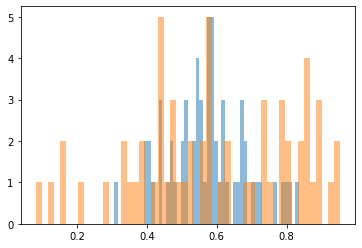

In [62]:
plt.hist(preds, bins=50, alpha=0.5)
plt.hist(test_y, bins=50, alpha=0.5)
plt.show()